In [ ]:
from scipy.io import wavfile
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt

sampling_rate, data = wavfile.read('./test_45/enhanced_audio_right_mic.wav')
freqs, ps = signal.welch(data, fs=sampling_rate, window='hann', nperseg = 4096,
             return_onesided=True, scaling='density', axis=- 1, average='mean')

plt.semilogy(freqs, ps/np.max(np.abs(ps)))
# plt.ylim([0.5e-3, 1])
plt.xlabel('frequency [Hz]')
plt.ylabel('PSD')
plt.show()

In [ ]:
t = np.arange(len(data)) / sampling_rate
f = np.linspace(0, sampling_rate, len(data))

analytic_signal = signal.hilbert(data)
amplitude_envelope = np.abs(analytic_signal)
# print(type(amplitude_envelope))


ses = np.abs(np.fft.fft(amplitude_envelope) / len(data))
ses = ses[:int(len(data)/50)]
freqs = f[:int(len(data)/50)]

# def strided_app(a, L, S ):  # Window len = L, Stride len/stepsize = S
#     nrows = ((a.size-L)//S)+1
#     n = a.strides[0]
#     return np.lib.stride_tricks.as_strided(a, shape=(nrows,L), strides=(S*n,n))

# # From this post : http://stackoverflow.com/a/14314054/3293881 by @Jaime
# def moving_average(a, n=3) :
#     ret = np.cumsum(a, dtype=float)
#     ret[n:] = ret[n:] - ret[:-n]
#     return ret[n - 1:] / n

# def mad_numpy(a, W):
#     a2D = strided_app(a,W,1)
#     return np.absolute(a2D - moving_average(a,W)[:,None]).mean(1)

# thres1 = np.median(strided_app(ses, int(sampling_rate/8),1),axis=1)
# thres2 = mad_numpy(ses, int(sampling_rate/8))
# thres3 = thres1 + 3 * thres2

# plt.plot(t[:10000], amplitude_envelope[:10000], label='envelope')
# plt.plot(t[:10000], data[:10000], label='signal')
# plt.legend()
# plt.show()

RPS = 100
BPFI = 854.3
BPFO = 645.8
BSF = 540.5
FTF = 43.1

ind_BPFI = (np.abs(freqs - BPFI)).argmin()
ind_BPFO = (np.abs(freqs - BPFO)).argmin()
ind_BSF = (np.abs(freqs - BSF)).argmin()
ind_FTF = (np.abs(freqs - FTF)).argmin()


plt.plot(freqs, ses)
plt.ylim(0,0.07*ses[0])
plt.plot(freqs[ind_BPFI], ses[ind_BPFI], 'ro')
plt.plot(freqs[ind_BPFO], ses[ind_BPFO], 'yo')
plt.plot(freqs[ind_BSF], ses[ind_BSF], 'rx')
plt.plot(freqs[ind_FTF], ses[ind_FTF], 'yx')
plt.show()


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


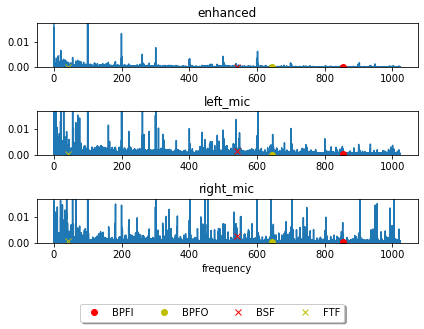

In [2]:
%matplotlib inline
from scipy.io import wavfile
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt
import os

ind = 57
foldername = f'./test_{ind}'
filename1 = 'enhanced_audio.wav'
filename2 = 'enhanced_audio_left_mic.wav'
filename3 = 'enhanced_audio_right_mic.wav'
filepath1 = os.path.join(foldername, filename1)
filepath2 = os.path.join(foldername, filename2)
filepath3 = os.path.join(foldername, filename3)

sampling_rate, data = wavfile.read(filepath1)
_, data_left = wavfile.read(filepath2)
_, data_right = wavfile.read(filepath3)

t = np.arange(len(data)) / sampling_rate
f = np.linspace(0, sampling_rate, len(data))

analytic_signal = signal.hilbert(data)
amplitude_envelope = np.abs(analytic_signal)

analytic_signal_left = signal.hilbert(data_left)
amplitude_envelope_left = np.abs(analytic_signal_left)

analytic_signal_right = signal.hilbert(data_right)
amplitude_envelope_right = np.abs(analytic_signal_right)

ses = np.abs(np.fft.fft(amplitude_envelope) / len(data))
ses = ses[:int(len(data)/50)]
freqs = f[:int(len(data)/50)]

ses_left = np.abs(np.fft.fft(amplitude_envelope_left) / len(data))
ses_left = ses_left[:int(len(data)/50)]

ses_right = np.abs(np.fft.fft(amplitude_envelope_right) / len(data))
ses_right = ses_right[:int(len(data)/50)]

RPS = 100
BPFI = 854.3
BPFO = 645.8
BSF = 540.5
FTF = 43.1

ind_BPFI = (np.abs(freqs - BPFI)).argmin()
ind_BPFO = (np.abs(freqs - BPFO)).argmin()
ind_BSF = (np.abs(freqs - BSF)).argmin()
ind_FTF = (np.abs(freqs - FTF)).argmin()

fig, (ax0, ax1, ax2) = plt.subplots(nrows=3)
ax0.plot(freqs, ses)
ax0.set_ylim([0,0.07*ses[0]])
ax0.plot(freqs[ind_BPFI], ses[ind_BPFI], 'ro', label='BPFI')
ax0.plot(freqs[ind_BPFO], ses[ind_BPFO], 'yo', label='BPFO')
ax0.plot(freqs[ind_BSF], ses[ind_BSF], 'rx', label='BSF')
ax0.plot(freqs[ind_FTF], ses[ind_FTF], 'yx', label='FTF')
# ax0.set_xlabel("frequency")
ax0.title.set_text('enhanced')
# ax0.legend()
ax1.plot(freqs, ses_left)
ax1.set_ylim([0,0.07*ses[0]])
ax1.plot(freqs[ind_BPFI], ses_left[ind_BPFI], 'ro')
ax1.plot(freqs[ind_BPFO], ses_left[ind_BPFO], 'yo')
ax1.plot(freqs[ind_BSF], ses_left[ind_BSF], 'rx')
ax1.plot(freqs[ind_FTF], ses_left[ind_FTF], 'yx')
# ax1.set_xlabel("frequency")
ax1.title.set_text('left_mic')
ax2.plot(freqs, ses_right)
ax2.set_ylim([0,0.07*ses[0]])
ax2.plot(freqs[ind_BPFI], ses_right[ind_BPFI], 'ro')
ax2.plot(freqs[ind_BPFO], ses_right[ind_BPFO], 'yo')
ax2.plot(freqs[ind_BSF], ses_right[ind_BSF], 'rx')
ax2.plot(freqs[ind_FTF], ses_right[ind_FTF], 'yx')
ax2.set_xlabel("frequency")
ax2.title.set_text('right_mic')
fig.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),
          fancybox=True, shadow=True, ncol=4)
fig.tight_layout()
fig.savefig(f'./results/result_{ind}.eps', format='eps')